In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import torch
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sys

In [1]:
from google.colab import files
f = files.upload()

Saving mid_animal_data_pub.pkl to mid_animal_data_pub.pkl


In [ ]:
data = pd.read_csv('/content/gts-seoul.csv',encoding='utf-8')
tmp = data[data["일시"] == "2011-03-21 06:00"]
tmp[["습도","풍속",'현지기압','기온','이슬점 온도']].sum(axis=1)

2101    1038.9
dtype: float64

In [ ]:
data = data[["습도","풍속",'현지기압','기온','이슬점 온도']]
data = data.dropna()

a = len(data) #행의 수
b = data['습도'].mean()
c = data['풍속'].max()
d = data['기온'].min()
print(a+b+c+d)

32128.421619683173


In [ ]:
def corr(a,b):
  a = a - a.mean()
  b = b - b.mean()

  #cosine similarity = (a*b)/|a||b|
  return (a*b).sum() / (((a*a).sum()**0.5) * ((b*b).sum()**0.5))

#습도 풍속 현지기압 기온
a = corr(data["습도"], data["이슬점 온도"])
b = corr(data["풍속"], data["이슬점 온도"])
c = corr(data["현지기압"], data["이슬점 온도"])
d = corr(data["기온"], data["이슬점 온도"])
print(a,b,c,d)
print(a+b+c+d)

0.5721226831001317 -0.08680173999760286 -0.20970152226101682 0.9035827918403053
1.1792022126818174


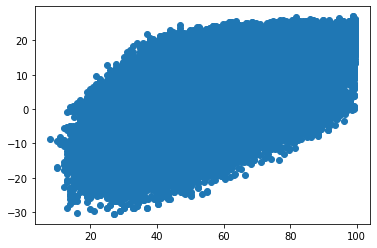

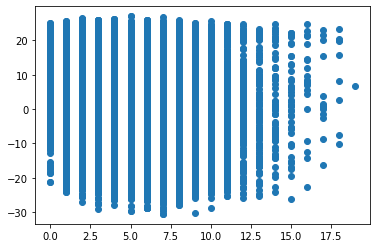

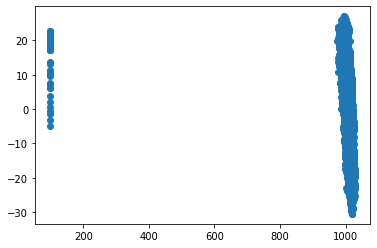

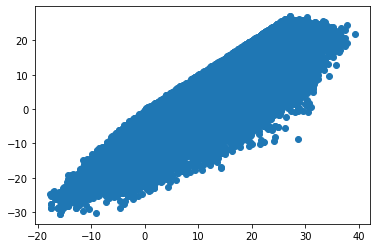

In [ ]:
plt.scatter(data['습도'],data['이슬점 온도'])
plt.show()
plt.scatter(data['풍속'],data['이슬점 온도'])
plt.show()
plt.scatter(data['현지기압'],data['이슬점 온도'])
plt.show()
plt.scatter(data['기온'],data['이슬점 온도'])
plt.show()


In [ ]:
data = data.loc[data['현지기압']>200, :]
data

,습도,풍속,현지기압,기온,이슬점 온도
0,70.7,3.0,995.0,25.0,19.3
1,61.8,3.0,993.9,27.9,19.9
2,49.7,3.0,992.3,30.5,18.8
3,66.8,6.0,992.1,28.8,22.0
4,79.6,4.0,993.4,26.3,22.5
...,...,...,...,...,...
32080,65.7,11.0,987.0,21.7,15.0
32081,83.8,5.0,989.7,18.9,16.1
32082,84.9,7.0,991.2,18.8,16.2
32083,85.9,4.0,991.7,18.4,16.0


In [ ]:
def corr(a,b):
  a = a - a.mean()
  b = b - b.mean()

  #cosine similarity = (a*b)/|a||b|
  return (a*b).sum() / (((a*a).sum()**0.5) * ((b*b).sum()**0.5))

#습도 풍속 현지기압 기온
a = corr(data["습도"], data["이슬점 온도"])
b = corr(data["풍속"], data["이슬점 온도"])
c = corr(data["현지기압"], data["이슬점 온도"])
d = corr(data["기온"], data["이슬점 온도"])
print(a,b,c,d)
print(a+b+c+d)

0.5721221451072883 -0.08681412771332694 -0.7701750683144204 0.9035922524679421
0.618725201547483


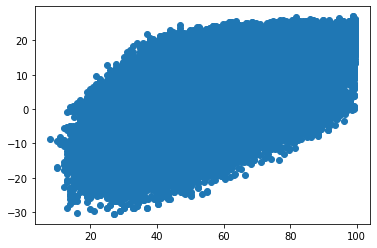

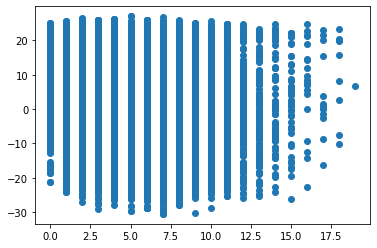

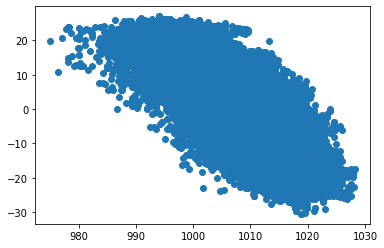

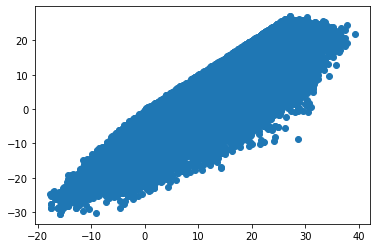

In [ ]:
plt.scatter(data['습도'],data['이슬점 온도'])
plt.show()
plt.scatter(data['풍속'],data['이슬점 온도'])
plt.show()
plt.scatter(data['현지기압'],data['이슬점 온도'])
plt.show()
plt.scatter(data['기온'],data['이슬점 온도'])
plt.show()

In [ ]:
model = LinearRegression()
X = data[['습도','풍속','현지기압','기온']]
Y = data['이슬점 온도']
model.fit(X,Y)
print(model.coef_, model.intercept_)

((model.predict(X)-Y)**2).mean()

[ 0.2676329  -0.03078923  0.00952646  0.92936961] -32.91662937401235


1.168514629572586

In [3]:
import pickle
data = pickle.load(open("mid_animal_data_pub.pkl", "rb"))
data

{'train_vectors': array([[ 6.765437  ,  2.335988  ,  2.2718782 , ..., -3.7908099 ,
         -5.7790656 , -8.452645  ],
        [ 3.9811578 ,  0.8993346 ,  0.3574735 , ..., -0.40794182,
         -3.505698  , -5.865824  ],
        [ 1.5094669 , -1.108995  , -2.3785057 , ...,  4.175896  ,
         -1.3695054 , -3.9586785 ],
        ...,
        [ 3.8107047 ,  1.5099052 ,  1.7827855 , ..., -2.885677  ,
         -3.352014  , -4.757718  ],
        [ 7.604     ,  1.8847884 ,  1.2902098 , ..., -2.2294068 ,
         -5.539374  , -8.502373  ],
        [ 5.3538036 ,  2.0250673 ,  1.8471651 , ..., -3.2370934 ,
         -4.578217  , -6.5192943 ]], dtype=float32),
 'train_images': array([[[[  8,   9,  11],
          [  6,   7,   9],
          [  6,   7,   9],
          ...,
          [  2,   4,   4],
          [  2,   4,   3],
          [  1,   3,   2]],
 
         [[  8,   9,  11],
          [  6,   7,   9],
          [  6,   7,   9],
          ...,
          [  2,   4,   4],
          [  2,   4,  

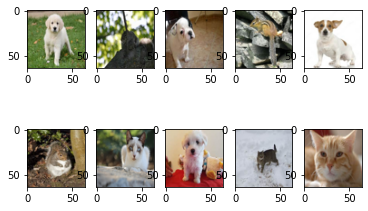

In [4]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(data['test1_images'][i])
 
plt.show()


In [6]:
def cosine(a,b):
   return (a*b).sum() / (((a*a).sum() * (b*b).sum())**0.5)

cosine(data['train_vectors'][0], data['test1_vectors'][1])

-0.23914207238931945

In [7]:
ids = []
for i in range(10):
  arr=[]
  for j in range(data['train_vectors'].shape[0]):
    arr.append((cosine(data['test1_vectors'][i], data['train_vectors'][j]),j))
  arr.sort(reverse=True)
  ids.append([i for c, i in arr[:3]])
ids


[[346, 442, 158],
 [463, 97, 70],
 [240, 699, 480],
 [571, 977, 338],
 [593, 282, 584],
 [498, 835, 37],
 [736, 324, 918],
 [127, 382, 959],
 [7, 991, 141],
 [447, 847, 501]]

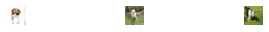

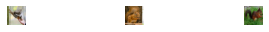

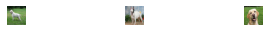

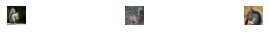

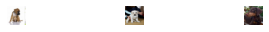

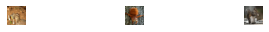

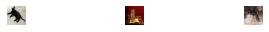

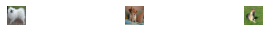

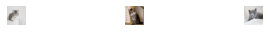

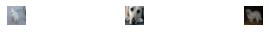

In [8]:
i = 1
for arr in ids:
  for j in arr:
    plt.subplot(10,3,i)
    plt.imshow(data['train_images'][j])
    plt.axis("off")
    i+=1
  plt.show()


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256,3)

optim = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z, y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch%1000==0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 1.4067473411560059
epoch: 1000, cost: 3.939226007787511e-05
epoch: 2000, cost: 3.131042103632353e-05
epoch: 3000, cost: 2.454920468153432e-05
epoch: 4000, cost: 1.8129872842109762e-05
epoch: 5000, cost: 1.2652843906835187e-05
epoch: 6000, cost: 8.447143954981584e-06
epoch: 7000, cost: 5.467550636240048e-06
epoch: 8000, cost: 3.469396915534162e-06
epoch: 9000, cost: 2.175445388274966e-06
epoch: 10000, cost: 1.3544062085202313e-06


In [11]:
test2 = torch.from_numpy(data['test2_vectors'])
ans = torch.argmax(model(test2), dim=1)
ans

tensor([2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0,
        1, 1, 1, 1, 2, 2])